# Data Motivation for RBC

Last update: Oct 20th, 2020

In [8]:
import pandas_datareader.data as web
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
start_date = datetime.datetime(1950, 1, 1)
end_date = datetime.datetime(2020, 9, 1)

In [10]:
# Read some data
GDP = web.DataReader('GDPC1', 'fred', start_date, end_date)
C = web.DataReader('PCECC96', 'fred', start_date, end_date)
I = web.DataReader('GPDIC1', 'fred', start_date, end_date)

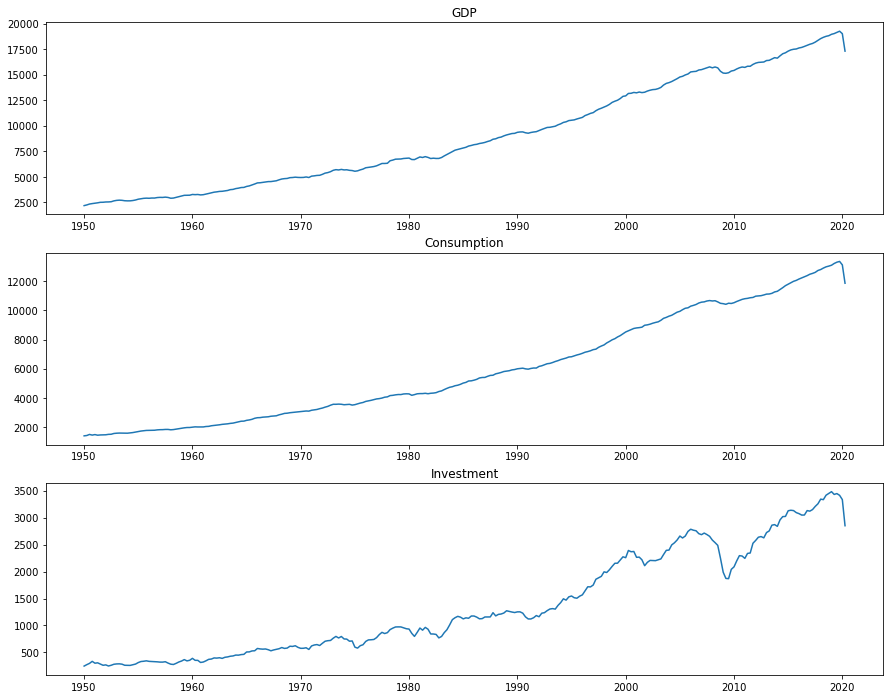

In [11]:
plt.figure(figsize = (15, 12))
plt.subplot(3, 1, 1)
plt.plot(GDP)
plt.title("GDP")
plt.subplot(3, 1, 2)
plt.plot(C)
plt.title("Consumption")
plt.subplot(3, 1, 3)
plt.plot(I)
plt.title("Investment")
plt.show()

In [5]:
GDP_growth = np.log(GDP).diff(1)
C_growth = np.log(C).diff(1)
I_growth = np.log(I).diff(1)

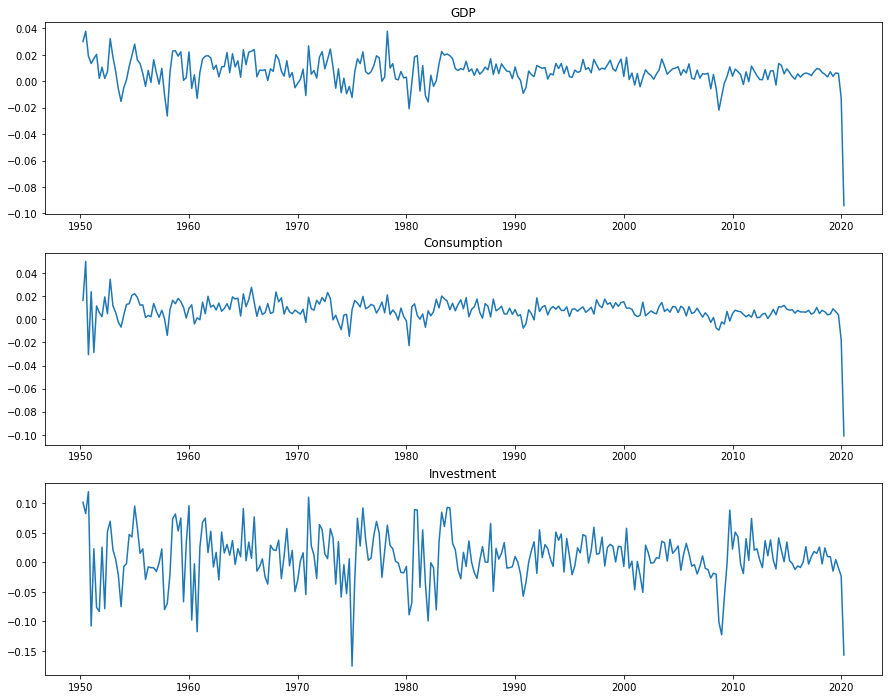

In [6]:
plt.figure(figsize = (15, 12))
plt.subplot(3, 1, 1)
plt.plot(GDP_growth)
plt.title("GDP")
plt.subplot(3, 1, 2)
plt.plot(C_growth)
plt.title("Consumption")
plt.subplot(3, 1, 3)
plt.plot(I_growth)
plt.title("Investment")
plt.show()

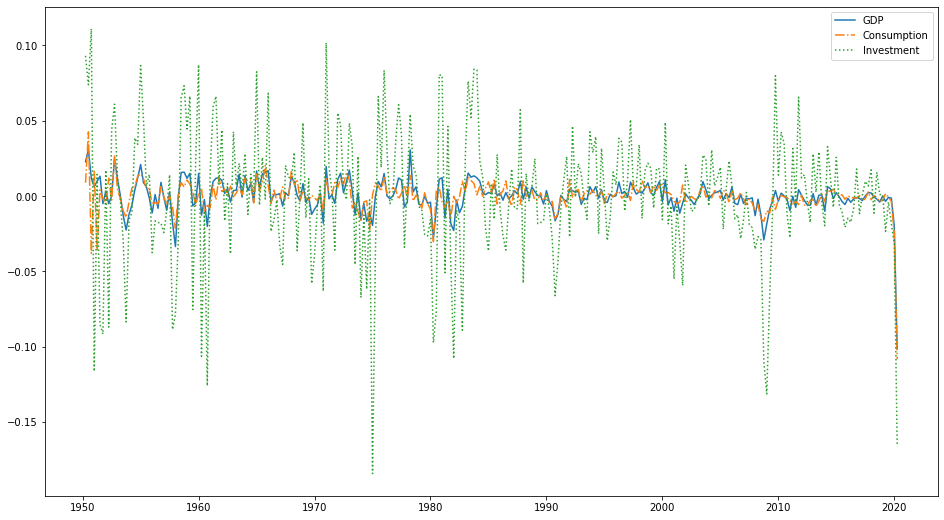

In [33]:
# Compare the demeaned series
plt.figure(figsize = (16, 9))
plt.plot(GDP_growth - GDP_growth.mean(), '-', label = "GDP")
plt.plot(C_growth - C_growth.mean(), '-.', label = "Consumption")
plt.plot(I_growth - I_growth.mean(), ':', label = "Investment")
plt.legend(loc = "best")
plt.show()